## Simple Linear Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


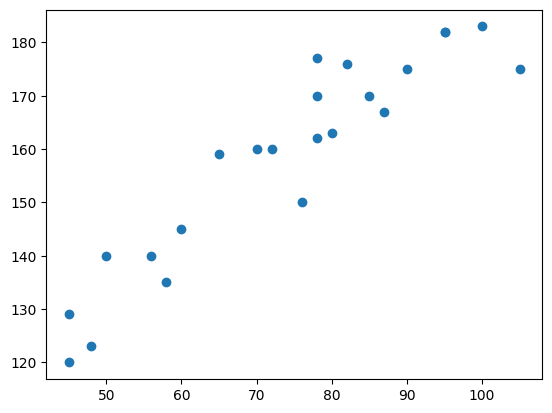

In [4]:
plt.scatter(df['Weight'], df['Height'])

In [41]:
#dependent and independent variables
X= pd.DataFrame(df['Weight'])
Y= pd.Series(df['Height'])
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [42]:
# test train split
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
X.shape

(23, 1)

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [45]:
#Standardization to do better gradient descent
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train) # fit here is used to calculate the mean and std deviation of the data and transform is used to transform the data to the standard form

In [47]:
X_test = scaler.transform(X_test) # here we are using the mean and std deviation of the training data to transform the test data

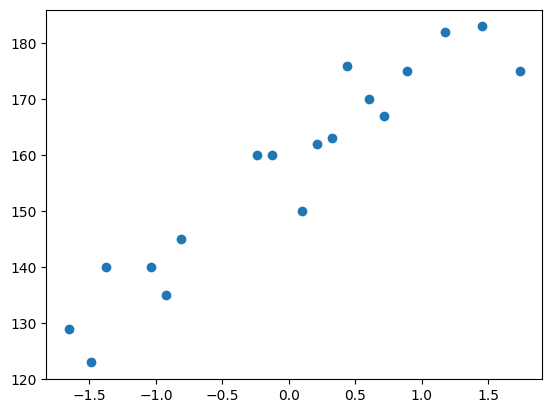

In [48]:
plt.scatter(X_train,Y_train)

In [49]:
#model training

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
model.fit(X_train,Y_train)

LinearRegression()

In [51]:
model.coef_, model.intercept_

(array([17.03440872]), np.float64(157.5))

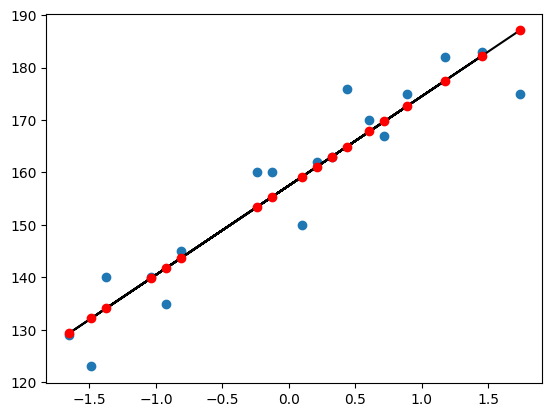

In [52]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train),color='black',marker='o',mec='red',mfc='red')

In [53]:
#prediction

Y_pred = model.predict(X_test)

In [54]:
Y_pred,Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

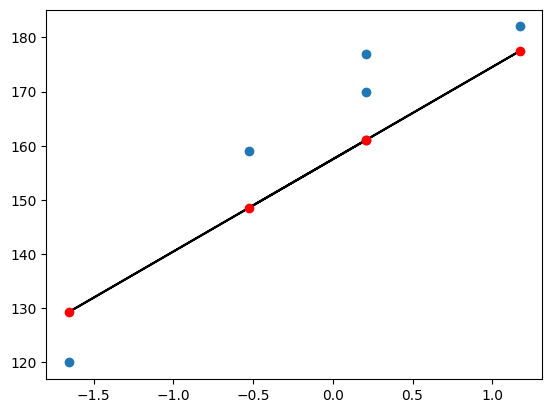

In [55]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='black',marker='o',mec='red',mfc='red')

In [57]:
#metrics to judge the model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [58]:
r = r2_score(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)    
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
ar2 = 1- ((1-r)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

In [59]:
print(f"R squared: {r}\n Mean Absolute Error: {mae}\n Mean Squared Error: {mse}\n Root Mean Squared Error: {rmse}\n Adjusted R squared: {ar2}")

R squared: 0.776986986042344
 Mean Absolute Error: 9.822657814519232
 Mean Squared Error: 109.77592599051664
 Root Mean Squared Error: 10.477400726827081
 Adjusted R squared: 0.7026493147231252


In [61]:
import seaborn as sns

C:\Users\Rakshat\AppData\Local\Temp\ipykernel_13040\1611132593.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

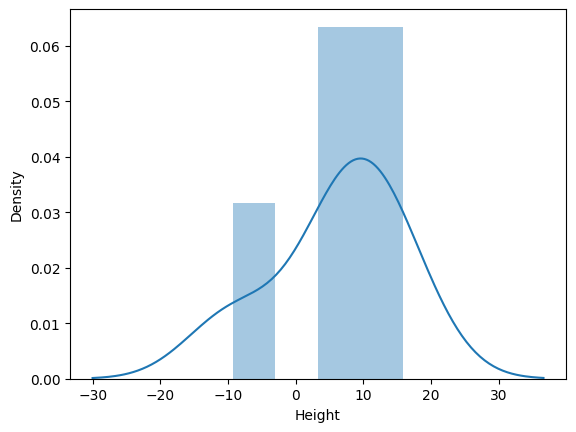

In [62]:
# how to judge our model 
# now we will use residual plot to check the model
residual = Y_test - Y_pred
sns.distplot(residual,kde=True)

In [63]:
# if the residual plot is normally distributed then our model is good

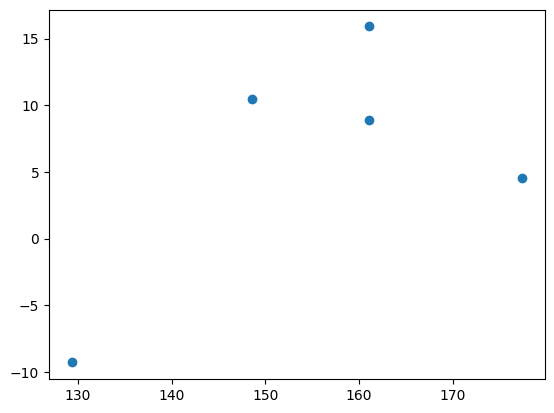

In [64]:
# and the scatter plot of residual vs predicted value should be random and should not have any pattern
plt.scatter(Y_pred,residual)